## Homework 09 - Through the Levels of Abstraction

# <b><font color ="red">Assignment not yet complete. Do not start until linked on the Calendar on the Canvas page</font></b>

### Assigned for Spring 2024 Semester: 4/16/2024
### Due for Spring 2024 Semester: 4/25/2024 at 11:59pm on Canvas

### Points: 2,000 points

> <b>Note:</b> Review the <a href = "https://github.com/mmorri22/cse30321/blob/main/cse30321-syllabus.md">Course Syllabus</a> for policies regarding late submissions for Homework Assignments. For this group assignment, you may use only 48 extension tokens (there are students who have used 24 hours, so this will ensure every group has an equal opportunity to submit.)

### Sections: Here is the breakdown of the Assignment
<ol>
    <li><b>Group Assignment</b> - Brief coverage of the rules surronding group assignments</li>
    <li><b>Background</b>: Reviewing the appropriate levels of abstraction needed to implement the SIMD, Threading, and Python Multiprocessing portions of the assignments.</li>
    <li><b>Single-Issue Multiple Data</b> - Loop Unrolling in C.</li>
    <li><b>Thread Level Parallelism</b> - Multi-threading programming using OpenMP in C.</li>
    <li><b>Multiprocessing</b> - Performing large matrix multiplication in Python.</li>
    <li><b>Detailed Submission Information</b> - What files need to be included in your submission, and where to submit.</li>
</ol>

### Part 1 - Group Assignment Overview

This programming assignment may be performed in groups of <b>no less than 3</b> and <b>no more than 4</b> students.

Your group will submit a <b>PDF report</b> as well as code files in a .zip file through Canvas Speedgrader.

<b>Only one student</b> from the group shall submit an assignment. In the accompanying report, which we will detail later in this assignment write up, include the name of each member on the cover page, which is how the other students will get credit for the assignment.

Each student member is <b>required to perform an equal share of the work</b>. The instructor reserves the right to change a grade if it is determined that a student didn't do their work or coerced a classmate to do the work for them.

### Part 2 - Background

In this course, you have learned about several levels of abstraction in a computer, from the <b>assembly language</b>, <b>architecture design</b>, <b>pipelining</b>, <b>cache memory</b>, <b>virtual memory</b>, <b>multiprocessing</b> and <b>multithreading</b>.

In this assignment, you will have the opportunity to demonstrate your proficiency at the level of abstraction that most of you will pursue in your careers: <b>programming</b>. You will implement C and Python solutions to classic programming problems, with a twist that you will improve upon those solutions with <b>loop reordering</b>, <b>loop unrolling<b>, <b>SIMD</b>, <b>MIMD</b>, and <b>Python multiprocessing</b>.
    
For your reference, here are some links to code for your review that will help you navigate this assignment.
<ul>
    <li><code><a href = "">File Name</a></code> - Description</li>
    <li><code><a href = "">File Name</a></code> - Description</li>
    <li><code><a href = "">File Name</a></code> - Description</li>
    <li><code><a href = "">File Name</a></code> - Description</li>
    <li><code><a href = "">File Name</a></code> - Description</li>
    <li><code><a href = "">File Name</a></code> - Description</li>
</ul>

## Part 3 - SIMD in C

You will update and modify this node to insert a node into a Doubly Linked List like you learned in Data Structures or Introduction to Computing. You will <b>write a report</b> and include your completed <code>.S</code> files (as detailed in Part 4) which perform this Doubly Linked List task:

> Hint 1: You will be programming using the same <a href = "https://www.cs.cornell.edu/courses/cs3410/2019sp/riscv/interpreter">RISC-V interpreter</a> that we coded the Singly Linked List in class.

> Hint 2: Here is an equivalent version of the Doubly Linked List that was presented in lecture (<a href = "https://raw.githubusercontent.com/mmorri22/cse30321/main/inclass/lec11/code/dllist.c">dllist.c</a>). Note that the compilation on the Notre Dame machines will use the x86_64 architecture, which means that the <code>dll_node*</code> consumes 64 bits, not 32 bits, and there is more segmentation between nodes that we have in this assignment. But it may be helpful for you to compare operation.

You are given the following C code segments for this assignment:

1 - A C Struct for a Doubly Linked List node:

    #include <stdlib.h>
    
    typedef struct dll_node{
        int the_int;
        struct dll_node* prev_node;
        struct dll_node* next_node;
    }dll_node;
    
2 - A C struct for the head node to provide encapsulation for the Doubly Linked List:

    typedef struct dllist{
        struct dll_node* head_ptr;
        struct dll_node* tail_ptr;
    }dllist;
    
3 - A function where the head_ptr and a specific value to delete may be found

    void delete_node( dllist* the_list, delete_val){
    
        dll_node* curr_ptr = the_list->head_node;
    
        while( curr_ptr != NULL ){
        
            if( curr_node->the_int == delete_val ){
            
                if( the_list->head_node == the_list->tail_node ){
                    the_list->head_node = NULL;
                    the_list->tail_node = NULL;
                }
                else if( curr_ptr == the_list->head_node ){
                    the_list->head_node = curr_ptr->next_node;
                    the_list->head_node->prev_node = NULL;
                }
                else if( curr_ptr == the_list->tail_node ){
                    the_list->tail_node = curr_ptr->prev_node;
                    the_list->tail_node->next_node = NULL;
                }
                else{
                    curr_ptr->prev_node->next_node = curr_ptr->next_node;
                    curr_ptr->next_node->prev_node = curr_ptr->prev_node;
                }
                
                free( curr_ptr );
            }
            
            if( curr_ptr != NULL )
                curr_ptr = curr_ptr->next_ptr;
        }
        
    }
    
3 - Next, a loop where the integers 3 to 1 were added to a Doubly Linked List is provided. In main, put <code>delete_node</code> in <code>x20</code> (specific to Part 5 only).

    int main(){
        dllist* the_list = ( dllist* )calloc( 1, sizeof(dllist) );

        for(int y = 3; y >= 0; --y){
            if(the_list->head_ptr == NULL){
                dll_node* made_node = ( dll_node* )calloc( 1, sizeof(dll_node) );
                made_node->value = y;
                the_list->head_ptr = made_node; 
                the_list->tail_ptr = made_node; 
            }
            else{
                dll_node* curr_ptr = the_list->head_ptr;
                while( curr_ptr->next_ptr != NULL ){
                    curr_ptr = curr_ptr->next_ptr;
                }
                dll_node* made_node = ( dll_node* )calloc( 1, sizeof(dll_node) );
                made_node->value = y;
                curr_ptr->next_ptr = made_node;
                made_node->prev_ptr = curr_ptr;
                the_list->tail_ptr = made_node;
            }
        }
        
        int delete_val = 3;
        delete_node( the_list, delete_val);

        dll_node* curr_ptr = the_list->head_ptr;
        dll_node* next_ptr = curr_ptr->next_ptr;
        while( curr_ptr != NULL ){
            free(curr_ptr);
            curr_ptr = next_ptr;
            next_ptr = curr_ptr->next_ptr;
        }

        free(the_list);
        return 0;
    }
    
4 - Finally, you are given the following problem statement:

Given the C structs for Doubly Linked Lists, and the following C code, write a RISC-V assembly language program and creates the Doubly Linked List for insertions. Given the following information, write a RISC-V assembly program for the following C code segment:
<ul>
    <li>Document the generated result and your changes, which you will include in your final report.</li>
    <li>The <code>dll_list</code> is created at address <code>0x7ffff620</code>. The pointer is in <code>x18</code></li>
    <li>Since the optimal size of the <code>dll_node</code> is 96 bits (one <code>int</code> and two <code>dll_node*</code> pointers with addresses), each new node is created every 128 bits to preserve memory alignment as the C compiler does.</li>
    <li>This also includes 128 bits from the initial <code>dll_list</code> struct.</li>
    <li><code>int x</code> is stored in <code>x19</code>.</li>
    <li>Assume 32 bits for integers and addresses for the 32-bit architecture.</li>
    <li>Free temporary registers and function arguments once they go out of scope, as we performed in class.</li>
</ul>

## Part 4 - Approach and Deliverables

In order to break down the assignment into manageable pieces - which will help promote coding techniques and maximize your possible points if your group can't complete the entire list - you will emulate the steps we completed in class when we coded the Singly Linked List together.

In the submission (see Part 5 for more details), you will complete each of the 4 parts.

<b>Points Towards Final Score</b>: Points that will be allocated towards grading the code and report for the specific part of the assignment.

<b>Report Deliverable</b>: What you need to detail in your report to earn full credit. Screen captures and drawings will go a long way to describing your work.

If you don't complete the part, you may describe what is currently not working in your code for partial credit (this would include a detailed description of what steps you have taken to try to troubleshoot the error for the partial credit)

> Hint: Remember that the grading TA has never seen your code or your work, and will need to decipher the working from your write up. Tell them the story of your work, and why the results they will see are the results you intended.

<b>Code Deliverable</b>: The name of the file you should include, as well as what needs to be in the file (as well as the equivalent step in the Singly Linked List).

For full credit, every file must have:
<ul>
    <li>A comment header with each student's names, the name of the file, and the date the file was created.</li>
    <li>A comment header which shows how the current file was modified from the previous file. Note in my Singly Linked List examples that I detail which lines are different from the previous file so you can study them on your own. Approach this assignment with the same level of detail.</li>
    <li>When you write procedures, you must have a procedure header with preconditions, postconditions, and the name. For example, note in <a href = "https://github.com/mmorri22/cse30321/blob/main/inclass-sols/lec10/sllist_step7.S">sllist_part7.S</a>, example procedure headers may be found at Lines 206 and 228.</li> 
</ul>

### Part 4.1 - Allocating the dllist struct

<b>Points Towards Final Score</b>: 200

<b>Report Deliverable</b>: Describe how you call the function calloc for the dllist struct, allocate the memory for the sllist struct, free the sllist struct main call, and detail a FREE_DLLIST procedure. You should show how your code allocates the 128 bits using calloc, as well as freeing the struct.

> Hint: Since the interpreter starts every value at 0, using the step function and screen captures to detail which lines of code are writing 0 to specific memory addresses. This approach will make it easier for you to prove understanding.

<b>Code Deliverable</b>: A file <code>dllist_step1.S</code> which is the doubly linked list equivalent to <a href = "https://github.com/mmorri22/cse30321/blob/main/inclass-sols/lec10/sllist_step1.S"><code>sllist_step1.S</code></a> in class.

<b>Hint:</b> Set the Data Memory in the interpreter to <code>0x7ffff648</code>, which will ensure that you are able to see the entire Doubly Linked List that you will program.

<b>Equivalent C Code</b>:

    #include <stdlib.h>
    
    typedef struct dll_node{
        int the_int;
        struct dll_node* prev_node;
        struct dll_node* next_node;
    }dll_node;

    typedef struct dllist{
        struct dll_node* head_ptr;
        struct dll_node* tail_ptr;
    }dllist;

    int main(){
        dllist the_list = ( dllist* )calloc( 1, sizeof(dllist) );

        free(the_list);
        return 0;
    }
    
<b>Sample Output:</b> While the values in the Data Memory are cleared, the registers regularly change to reflect the CALLOC and FREE procedures. 

Here is an example register state when my procedure <code>CALLOC_DLLIST</code> is initially called:
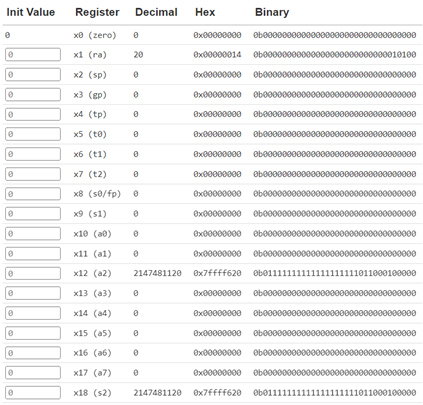

Here is an example register state when my procedure <code>FREE_DLLIST</code> is initially called. The precondition to the procedure is the same (the pointer to <code>dllist*</code>), but <code>x1</code> is different since we <code>jal</code> to a different procedure
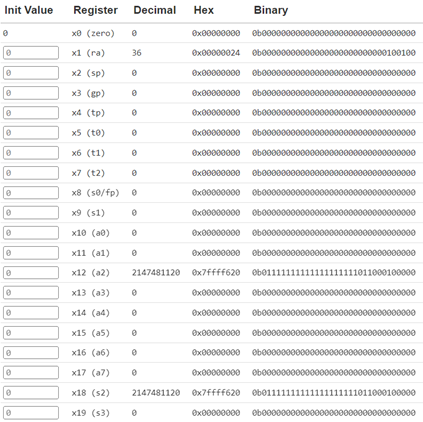

### Part 4.2 - Allocating the first dll_node and saving the data.

<b>Points Towards Final Score</b>: 500

<b>Report Deliverable</b>: Describe how you set up the for loop, and how you would insert the first node intro the doubly linked list. You should show the steps of how the node is created, and how both head_ptr and tail_ptr are pointing to the only node.

> Hint: Remember that, in a Doubly Linked List, that if there is only node, then both the head_ptr and tail_ptr point to that node. Also, remember the previous and next pointers must initially be NULL (whereas in the Singly Linked List, the next pointer must initially be NULL)

<b>Code Deliverable</b>: A file <code>dllist_step2.S</code> which is the doubly linked list equivalent to <a href = "https://github.com/mmorri22/cse30321/blob/main/inclass-sols/lec10/sllist_step4.S"><code>sllist_step4.S</code></a> in class.

<b>Equivalent C Code</b>:

    #include <stdlib.h>
    
    typedef struct dll_node{
        int the_int;
        struct dll_node* prev_node;
        struct dll_node* next_node;
    }dll_node;

    typedef struct dllist{
        struct dll_node* head_ptr;
        struct dll_node* tail_ptr;
    }dllist;

int main(){
    dllist* the_list = ( dllist* )calloc( 1, sizeof(dllist) );

    for(int y = 3; y >= 0; --y){
        if(the_list->head_ptr == NULL){
            dll_node* made_node = ( dll_node* )calloc( 1, sizeof(dll_node) );
            made_node->the_int = y;
            the_list->head_ptr = made_node; 
            the_list->tail_ptr = made_node; 
        }
    }

    free(the_list);
    return 0;
}



<b>Sample Output:</b> After completing the insertion, I paused the interpreter to show the status of the insertion of the first node. Eventually, the full code clears the entire memory, but this is an example of a type of screenshot you can use to demonstrate how your code works.

> Note: The interpreter only highlights values in blue if they are not 0. If a value that you wrote to is 0 and it's not blue, that is fine and expected. This is where detailed description in your report will help the grader immensely.

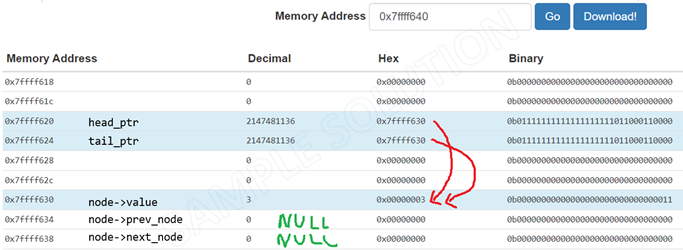

### Part 4.3 - Inserting the Remaining Nodes.

<b>Points Towards Final Score</b>: 500

<b>Report Deliverable</b>: Describe how you will insert the other nodes, including setting up the pointers to the previous and next nodes. Show examples of what the data memory looks when as you step through the nodes.

> Note: At this stage, you do not need to free the Doubly Linked List nodes. That will be completed in Part 4.4. So there will not be any deductions for not freeing the nodes (although all other clearing and freeing of data applies). Earlier, you freed the dllist* node, so its OK at this stage that you code frees the dllist*, but none of the dll_node* memory.

<b>Code Deliverable</b>: A file <code>dllist_step3.S</code> which is the doubly linked list equivalent to <a href = "https://github.com/mmorri22/cse30321/blob/main/inclass-sols/lec10/sllist_step6.S"><code>sllist_step6.S</code></a> in class.

<b>Equivalent C Code</b>:

    #include <stdlib.h>
    
    typedef struct dll_node{
        int the_int;
        struct dll_node* prev_node;
        struct dll_node* next_node;
    }dll_node;

    typedef struct dllist{
        struct dll_node* head_ptr;
        struct dll_node* tail_ptr;
    }dllist;

    int main(){
        dllist* the_list = ( dllist* )calloc( 1, sizeof(dllist) );

        for(int y = 3; y >= 0; --y){
            if(the_list->head_ptr == NULL){
                dll_node* made_node = ( dll_node* )calloc( 1, sizeof(dll_node) );
                made_node->the_int = y;
                the_list->head_ptr = made_node; 
                the_list->tail_ptr = made_node; 
            }
            else{
                dll_node* curr_ptr = the_list->head_ptr;
                while( curr_ptr->next_node != NULL ){
                    curr_ptr = curr_ptr->next_node;
                }
                dll_node* made_node = ( dll_node* )calloc( 1, sizeof(dll_node) );
                made_node->the_int = y;
                curr_ptr->next_node = made_node;
                made_node->prev_node = curr_ptr;
                the_list->tail_ptr = made_node;
            }
        }

        free(the_list);
        return 0;
    }
    
<b>Sample Output:</b> After completing each insertion, I paused the interpreter to show the status of the insertion of the first node. At this stage, the memory is not freed (that is Part 4.4, and you will not lose any points for not having memory freed in <code>dllist_step3.S</code>)

After inserting the second node (y=2):
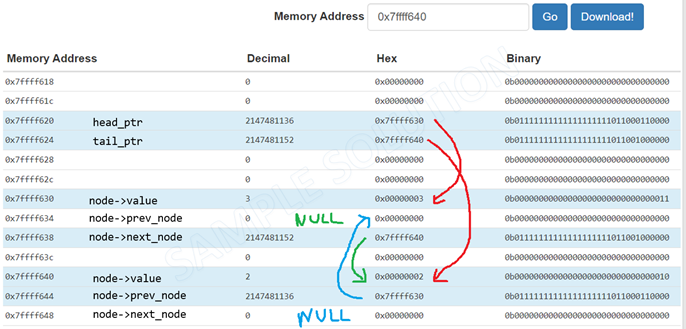
   
After inserting the third node (y=1):
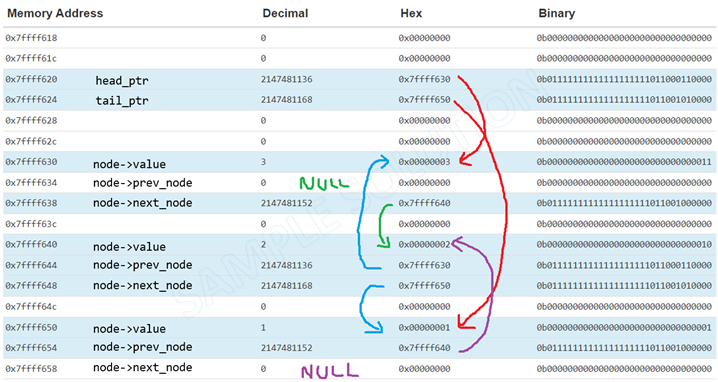
   
After inserting the third node (y=0):
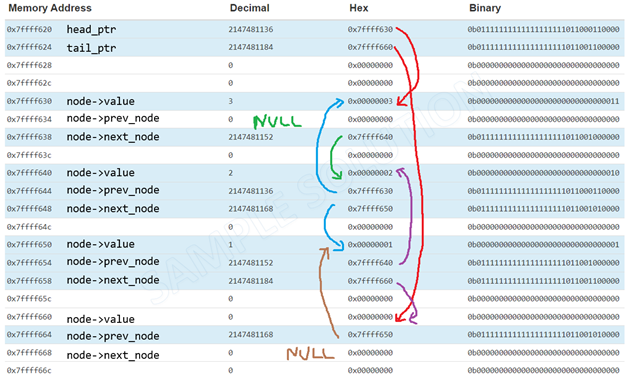

### Part 4.4 - Freeing the Nodes.

<b>Points Towards Final Score</b>: 200

<b>Report Deliverable</b>: Describe how you will find and free every dll_node*, including seeking and freeing the nodes.

> Note: This should work for both this step (freeing what is finished after Step 4.3) as well as after the next step (freeing after a deletion)

<b>Code Deliverable</b>: A file <code>dllist_step4.S</code> which is the doubly linked list equivalent to <a href = "https://github.com/mmorri22/cse30321/blob/main/inclass-sols/lec10/sllist_step7.S"><code>sllist_step7.S</code></a> in class.

<b>Equivalent C Code</b>:

    #include <stdlib.h>
    
    typedef struct dll_node{
        int the_int;
        struct dll_node* prev_node;
        struct dll_node* next_node;
    }dll_node;

    typedef struct dllist{
        struct dll_node* head_ptr;
        struct dll_node* tail_ptr;
    }dllist;

    int main(){
        dllist* the_list = ( dllist* )calloc( 1, sizeof(dllist) );

        for(int y = 3; y >= 0; --y){
            if(the_list->head_ptr == NULL){
                dll_node* made_node = ( dll_node* )calloc( 1, sizeof(dll_node) );
                made_node->value = y;
                the_list->head_ptr = made_node; 
                the_list->tail_ptr = made_node; 
            }
            else{
                dll_node* curr_ptr = the_list->head_ptr;
                while( curr_ptr->next_ptr != NULL ){
                    curr_ptr = curr_ptr->next_ptr;
                }
                dll_node* made_node = ( dll_node* )calloc( 1, sizeof(dll_node) );
                made_node->value = y;
                curr_ptr->next_ptr = made_node;
                made_node->prev_ptr = curr_ptr;
                the_list->tail_ptr = made_node;
            }
        }


        // Free all remaining nodes
        dll_node* curr_ptr = the_list->head_ptr;
        dll_node* next_ptr = curr_ptr->next_ptr;
        while( curr_ptr != NULL ){
            free(curr_ptr);
            curr_ptr = next_ptr;
            next_ptr = curr_ptr->next_ptr;
        }

        free(the_list);
        return 0;
    }

### Part 4.5 - Individual Node Deletion

<b>Points Towards Final Score</b>: 600

<b>Report Deliverable</b>: Show how you would find and delete one element in the Linked List based on the value. Note how this is called <i>before</i> the free() in main. This means that the find code should delete one node, and then free the other nodes after the call.

To account for all the cases in the <code>delete_node</code> function, describe the code and show the output where <code>delete_val</code> in main is:
<ul>
    <li><code>delete_val = 3;</code> - tests deletion of the <code>head_node</code></li>
    <li><code>delete_val = 0;</code> - tests deletion of the <code>tail_node</code></li>
    <li><code>delete_val = 2;</code> - tests deletion of an internal node</li>
    <li><code>delete_val = -1;</code> - tests that a bad value doesn't delete anything</li>
</ul>

<b>Code Deliverable</b>: A file <code>dllist_final.S</code>

    #include <stdlib.h>
    
    typedef struct dll_node{
        int the_int;
        struct dll_node* prev_node;
        struct dll_node* next_node;
    }dll_node;

    typedef struct dllist{
        struct dll_node* head_ptr;
        struct dll_node* tail_ptr;
    }dllist;
    
    /**** Function here *****/
    void delete_node( dllist* the_list, int delete_val){

        dll_node* curr_ptr = the_list->head_ptr;

        while( curr_ptr != NULL ){

            if( curr_ptr->the_int == delete_val ){

                if( the_list->head_ptr == the_list->tail_ptr ){
                    the_list->head_ptr = NULL;
                    the_list->tail_ptr = NULL;
                }
                else if( curr_ptr == the_list->head_ptr ){
                    the_list->head_ptr = curr_ptr->next_node;
                    the_list->head_ptr->prev_node = NULL;
                }
                else if( curr_ptr == the_list->tail_ptr ){
                    the_list->tail_ptr = curr_ptr->prev_node;
                    the_list->tail_ptr->next_node = NULL;
                }
                else{
                    curr_ptr->prev_node->next_node = curr_ptr->next_node;
                    curr_ptr->next_node->prev_node = curr_ptr->prev_node;
                }

                free( curr_ptr );
            }

            if( curr_ptr != NULL )
                curr_ptr = curr_ptr->next_node;
        }
    }
    /****** Function Ends here ***********/

    int main(){
        dllist* the_list = ( dllist* )calloc( 1, sizeof(dllist) );

        for(int y = 3; y >= 0; --y){
            if(the_list->head_ptr == NULL){
                dll_node* made_node = ( dll_node* )calloc( 1, sizeof(dll_node) );
                made_node->the_int = y;
                the_list->head_ptr = made_node; 
                the_list->tail_ptr = made_node; 
            }
            else{
                dll_node* curr_ptr = the_list->head_ptr;
                while( curr_ptr->next_node != NULL ){
                    curr_ptr = curr_ptr->next_node;
                }
                dll_node* made_node = ( dll_node* )calloc( 1, sizeof(dll_node) );
                made_node->the_int = y;
                curr_ptr->next_node = made_node;
                made_node->prev_node = curr_ptr;
                the_list->tail_ptr = made_node;
            }
        }

        int delete_val = 3;
        delete_node( the_list, delete_val);

        dll_node* curr_ptr = the_list->head_ptr;
        dll_node* next_ptr = curr_ptr->next_node;
        while( curr_ptr != NULL ){
            free(curr_ptr);
            curr_ptr = next_ptr;
            next_ptr = curr_ptr->next_node;
        }

        free(the_list);
        return 0;
    }
    
<b>Sample Outputs</b>: The first image is the result of running the interpreter and stopping immediately after the node containing 3 was deleted (the exact code shown in the example):

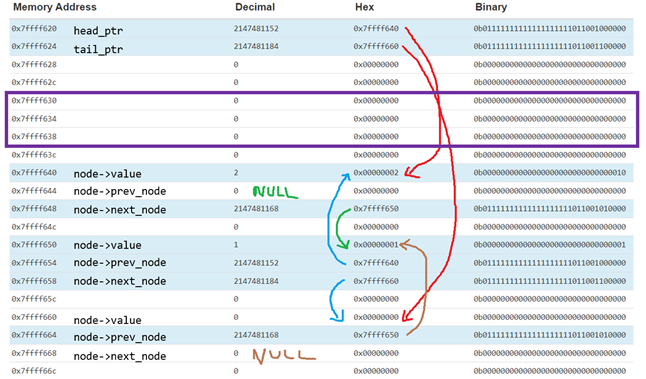

The second image is the result of changing the value of <b>int delete_val to 0</b> running the interpreter and stopping immediately after the node containing 0 was deleted. (Note, in this run, 3 is <i>not</i> deleted):
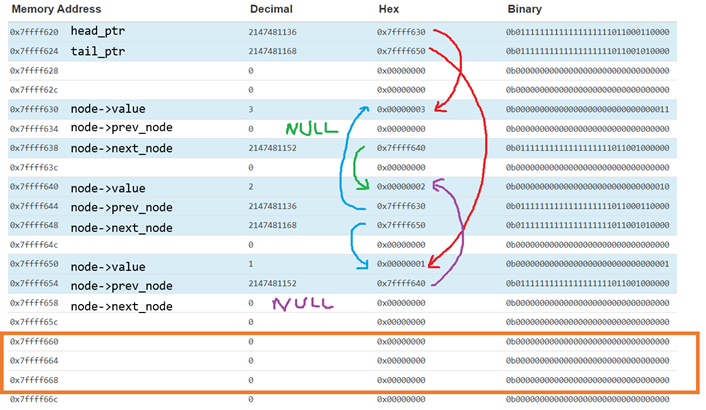

The third image is the result of changing the value of <b>int delete_val to 2</b> running the interpreter and stopping immediately after the node containing 2 was deleted. (Note, in this run, neither 3 nor 0 is <i>not</i> deleted):
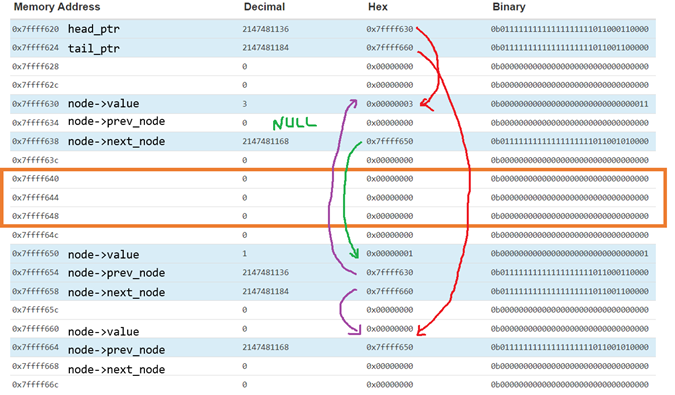

## Part 5 - Detailed Submission Information

1 - You should include all the files in a .zip file. These will include:
<ul>
    <li>A <b>PDF with your report</b>. It <i>must</i> be a PDF since text editors often have issues rendering images if done on a different OS. In the past, TAs have marked points off because the image simply didn't render on their machine, so the work wasn't shown.</li>
    <li>Five <b>separate</b> assembly files to demonstrate the run at that part</li>
    <ul>
        <li><code>dllist_step1.S</code></li>
        <li><code>dllist_step2.S</code></li>
        <li><code>dllist_step3.S</code></li>
        <li><code>dllist_step4.S</code></li>
        <li><code>dllist_final.S</code> - Students have submitted the final with copies for each test for the final. This is acceptable, although the TA will be asked to make a change and run the code, so it is not required.</li>
    </ul>
</ul>

2 - <b>Only one group member</b> needs to submit the ZIP file. (In fact, do not have multiple members submit. This inevitably causes confusion among the TAs.) You must include all group members (and Notre Dame emails) on the first page of the PDF. This is how the grading TA will input the remaining marks.

3 - Upload to the Canvas Speedgrader listed under Assignments at the following link: https://canvas.nd.edu/courses/82217/assignments/257852